<a href="https://colab.research.google.com/github/ChristianKitte/HelloRegression/blob/main/Logistische_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

print("Bibliotheken importiert....")

Bibliotheken importiert....


Im ersten Schritt wird der IRIS Datensatz über die Variable ds zugänglich gemacht. Dies kann direkt über sklearn geschehen. Anschließend erfolgt die Trennung nach Target (target) und Merkmalen (data).

Da ich mehrmals im Internet lesen konnte, dass der IRIS Datensatz bereits gut aufbereitet ist, werde ich hier nicht weiter versuchen, diesen zu cleanen.

Da ich weder Einfluss auf die Features habe und auch das verwendete Modell
aktuell nicht optimieren will, verzichte ich auf die Aufteilung in Trainings- und Testdaten und arbeite i.d.R mit den Defaultwerten.

In [128]:
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
# 'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
# 'target_names': ['setosa', 'versicolor', 'virginica'] mit 0, 1, 2 

ds = datasets.load_iris()
data=ds.data
target=ds.target

#ds
#data
#target

print("Daten vorhanden")

Daten vorhanden


Es existieren vier vorgegebene Werte, welche den vier Merkmalen des Datensatzes zugeordnet werden können (Somit die an EINER Blume gemessenen vier Größen): 

sepal length (cm) = 4,8

sepal width (cm) = 2,5

petal length (cm) = 5,3

petal width (cm) = 2,4

(Hierbei wird davon ausgegangen, dass die Reihenfolge der im DS angegebenen Reihenfolge entspricht)

Es ist anhand jeder der vier Angaben die Wahrscheinlichkeit zu berechnen, ob es sich um eine Iris Virginica handelt oder nicht. Im Datensatz ist Iris Virginica mit 2 gelabelt.




---
Im nächsten Schritt werden vier logistische Modelle, jeweils auf Basis eines einzelnen Merkmals, trainiert. Die Möglichen Klassen sind "Iris Virginica" sowie "Nicht Iris Virginica". Somit wird hier eine binäre logistische Regression durchgeführt.


In [129]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# sepal length (cm) ==> sl
sl=data[:,0] 

# sepal width (cm) ==> sw
sw=data[:,1] 

#petal length (cm) ==> pl
pl=data[:,2] 

# petal width (cm) ==> pw
pw=data[:,3] 

y=(target==2).astype(np.int)     # Label virgincia => 1, der Rest => 0 (wg. astype). Das Aarray wird hierbei nicht gekürzt !!!

logRegSl=LogisticRegression(max_iter=200)   # 200 notwendig, wenn ich alle Klassen verwende :)
logRegSl.fit(sl.reshape(-1,1) ,y)

logRegSw=LogisticRegression(max_iter=200)   # 200 notwendig, wenn ich alle Klassen verwende :)
logRegSw.fit(sw.reshape(-1,1) ,y)

logRegPl=LogisticRegression(max_iter=200)   # 200 notwendig, wenn ich alle Klassen verwende :)
logRegPl.fit(pl.reshape(-1,1) ,y)

logRegPw=LogisticRegression(max_iter=200)   # 200 notwendig, wenn ich alle Klassen verwende :)
logRegPw.fit(pw.reshape(-1,1) ,y)

print("Parameter SL: ",logRegSl.get_params)
print("Parameter SW: ",logRegSw.get_params)
print("Parameter PL: ",logRegPl.get_params)
print("Parameter PW: ",logRegPw.get_params)
print("")
print("Koeffizient SL: ",logRegSl.coef_)
print("Koeffizient SW: ",logRegSw.coef_)
print("Koeffizient PL: ",logRegPl.coef_)
print("Koeffizient PW: ",logRegPw.coef_)
print("")
print("Training vorbei")

Parameter SL:  <bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>
Parameter SW:  <bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>
Parameter PL:  <bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_clas

Im nächsten Schritt wird auf Basis der trainierten Modelle eine visuelle Darstellung der Regressionskurven sowie der Eigenschaften, getrennt nach den Merkmalen (oder Regressoren), dargestellt.

Diese dient nur der Übersicht. Das Merkmal ist in cm skaliert.

In [130]:
def makePlot(koeffizient, werte, prob, curAx, curNr):
  curAx.plot(werte,prob[:,1], "g-", label="Iris-Virginica")
  curAx.plot(werte,prob[:,0], "r--", label="Keine Iris-Virginica")

  # Hier muss eine Fallunterscheidung hin ! 
  # Handelt es sich um einen negativen Koeffizienten, so nimmt die 
  # Wahrscheinlichkeit für P(Iris-Virginica) ab. Alternativ könnte 
  # man in diesen Fällen auch prob[:,0] verwenden.
  if(koeffizient<0):
    limValue= werte[prob[:,1]<=0.5][0]
  else:
    limValue= werte[prob[:,1]>=0.5][0] 
  
  textPattern1="Diagramm "
  textPattern2=", Grenzwert für P=0,5 liegt bei: "
  print(textPattern1 + str(curNr) + textPattern2 + str(limValue))
  
  return curAx.plot([limValue,limValue],[-0.5,1.5])

print("Funktion makePlot angelegt")

Funktion makePlot angelegt


Diagramm 1, Grenzwert für P=0,5 liegt bei: [6.32632633]
Diagramm 2, Grenzwert für P=0,5 liegt bei: [1.85785786]
Diagramm 3, Grenzwert für P=0,5 liegt bei: [4.87687688]
Diagramm 4, Grenzwert für P=0,5 liegt bei: [1.66166166]


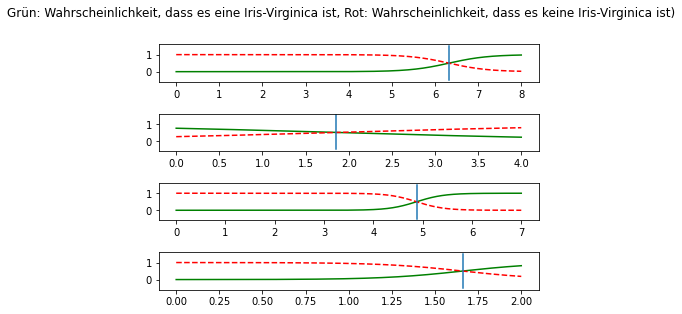

In [131]:
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
# https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376/2
# https://www.delftstack.com/de/howto/matplotlib/how-to-improve-subplot-size-or-spacing-with-many-subplots-in-matplotlib/ 
# https://www.studytonight.com/matplotlib/matplotlib-multiplots-with-subplots-function

# Die Ausgabe der Wahrscheinlichkeit umfasst immer 2 Felder ==> 1: P für "ist nicht", 2: P für "ist"

fig, ax = plt.subplots(4, 1)

fig.suptitle('Grün: Wahrscheinlichkeit, dass es eine Iris-Virginica ist, Rot: Wahrscheinlichkeit, dass es keine Iris-Virginica ist)',  y=1.08)
fig.tight_layout() # erzeugt passende Abstände ohne Überschneidungen :)

# sl
endWertSl=sl.max().round()
werteSl=np.linspace(0,endWertSl,1000).reshape(-1,1)
probSl= logRegSl.predict_proba(werteSl)
makePlot(logRegSl.coef_ ,werteSl,probSl,ax[0],1)

# sw
endWertSw=sw.max().round()
werteSw=np.linspace(0,endWertSw,1000).reshape(-1,1)
probSw= logRegSw.predict_proba(werteSw)
makePlot(logRegSw.coef_ ,werteSw,probSw,ax[1],2)

# pl
endWertPl=pl.max().round()
wertePl=np.linspace(0,endWertPl,1000).reshape(-1,1)
probPl= logRegPl.predict_proba(wertePl)
makePlot(logRegPl.coef_ ,wertePl,probPl,ax[2],3)

# pw
endWertPw=pw.max().round()
wertePw=np.linspace(0,endWertPw,1000).reshape(-1,1)
probPw= logRegPw.predict_proba(wertePw)
makePlot(logRegPw.coef_ ,wertePw,probPw,ax[3],4)

#probSw.min()

Abschließend komme ich nun zur Beantwortung der Frage, ob es sich bei "meiner" gefundenen Blume um eine Iris Virginica handelt.

Folgende Werte habe ich gemessen:

sepal length (cm) = 4,8 

sepal width (cm) = 2,5 

petal length (cm) = 5,3 

petal width (cm) = 2,4

Diese verwende ich und lasse mir anhand meiner vier binären Modelle, jeweils mit dem entsprechende Merkmal trainiert, eine Vorhersage machen. 
Im Idealfall sollte ich immer entweder ein positive oder negative Aussage erhalten.

In [132]:
def predictByFeature(merkmal, wert, model):
  wertArray = np.asarray(wert)
  wertArray = wertArray.reshape(-1,1)
  
  vorhersageAbsolut= model.predict(wertArray)
  vorhersageWahrscheinlichkeit = model.predict_proba(wertArray)

  print("Merkmal: " + merkmal)
  print("Gemessener Wert: " + str(wert))
  print("Vorhersage: " + str(vorhersageAbsolut))
  print("Wahrscheinlichkeit, dass es sich um eine Iris Virginica handelt: " + str(vorhersageWahrscheinlichkeit[:,1]))
  print("Wahrscheinlichkeit, dass es sich um keine Iris Virginica handelt: " + str(vorhersageWahrscheinlichkeit[:,0]))
  print("")

print("Funktion wurde erstellt")

Funktion wurde erstellt


In [133]:
print("Ergebnisse der binären Regression: ")

predictByFeature("Sepal Length (Sl)",4.8,logRegSl)
predictByFeature("Sepal Width (Sw)",2.5,logRegSw)
predictByFeature("Petal Length (Pl)",5.3,logRegPl)
predictByFeature("Petal Width (Pw)",2.4,logRegPw)

Ergebnisse der binären Regression: 
Merkmal: Sepal Length (Sl)
Gemessener Wert: 4.8
Vorhersage: [0]
Wahrscheinlichkeit, dass es sich um eine Iris Virginica handelt: [0.03237634]
Wahrscheinlichkeit, dass es sich um keine Iris Virginica handelt: [0.96762366]

Merkmal: Sepal Width (Sw)
Gemessener Wert: 2.5
Vorhersage: [0]
Wahrscheinlichkeit, dass es sich um eine Iris Virginica handelt: [0.4066497]
Wahrscheinlichkeit, dass es sich um keine Iris Virginica handelt: [0.5933503]

Merkmal: Petal Length (Pl)
Gemessener Wert: 5.3
Vorhersage: [1]
Wahrscheinlichkeit, dass es sich um eine Iris Virginica handelt: [0.82089909]
Wahrscheinlichkeit, dass es sich um keine Iris Virginica handelt: [0.17910091]

Merkmal: Petal Width (Pw)
Gemessener Wert: 2.4
Vorhersage: [1]
Wahrscheinlichkeit, dass es sich um eine Iris Virginica handelt: [0.96101057]
Wahrscheinlichkeit, dass es sich um keine Iris Virginica handelt: [0.03898943]



Das Ergebnis ist nicht ganz klar. Wird beispielsweise alleine Sepal Length zur Beurteilung herangezogen, so ist die Wahrscheinlichkeit eher sehr klein, dass es sich um eine Iris Virginica handelt. Nimmt man hingegen Petal With, so ist die Wahrscheinlichkeit für das Gegenteil sehr hoch.

Nicht hilfreich :)


---

Als weiterer Schritt wird nunmehr das Modell mit allen vier Werten trainiert und die Vorhersage anhand aller vier Werte vorgenommen.

In [134]:
# https://realpython.com/logistic-regression-python/
# https://hub.gke2.mybinder.org/user/scikit-learn-scikit-learn-8ljgciu1/lab/tree/notebooks/auto_examples/linear_model/plot_iris_logistic.ipynb
# https://heartbeat.fritz.ai/logistic-regression-in-python-using-scikit-learn-d34e882eebb1

# Es werden alle Merkmale genutzt(cm)
x_all = data[:,:] 
y_all = (target==2).astype(np.int)     # Label virgincia => 1, der Rest => 0 (wg. astype). Das Aarray wird hierbei nicht gekürzt !!!

logRegAll=LogisticRegression(max_iter=200)   # 200 notwendig, wenn ich alle Klassen verwende :)
logRegAll.fit(x_all ,y)

print("Klassen", logRegAll.classes_)
print("Intercept <> b0", logRegAll.intercept_)
print("Koeffizienten <> b1, b2, ...", logRegAll.coef_)

wert= np.asarray([4.8,2.5,5.3,2.4]) # muss natürlich der Reihenfolge des DS entsprechen...
voerhersage= logRegAll.predict(wert.reshape(-1,4))
voerhersage2= logRegAll.predict_proba(wert.reshape(-1,4))
print("Vorhersage: ",voerhersage[0])
print("Wahrscheinlichkeit, dass es sich um eine Iris Virginica handelt: ", voerhersage2[:,1])
print("Wahrscheinlichkeit, dass es sich um keine Iris Virginica handelt: ", voerhersage2[:,0])

Klassen [0 1]
Intercept <> b0 [-14.43121671]
Koeffizienten <> b1, b2, ... [[-0.39444787 -0.5133412   2.93087523  2.41709879]]
Vorhersage:  1
Wahrscheinlichkeit, dass es sich um eine Iris Virginica handelt:  [0.976495]
Wahrscheinlichkeit, dass es sich um keine Iris Virginica handelt:  [0.023505]


Auf Basis eines mit allen vier features trainierten Modells erhalten wir die Aussage, dass es sich bei der Blume zu 97,6 % um eine Iris Virginica handelt. 
Ich persönlich traue diesem Modell mehr als die nur mit einem feature trainierten Modelle. Daher ist meiner finale Antwort:

Ja, es handelt sich um eine Iris Virginica!

PS: tatsächlich ergibt sich der o.g. Wert auch bei einer manuellen Berechnung anhand der im Skript gegebenen Formel unter Verwendung der o.g. Werte (Koeffizienten und Intercept).